In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./performance.csv', sep='\t', header=None)
df.head()

,0,1,2,3,4,5,6
0,Epoch,10.00,20.00,30.00,40.0,50.00,BCT
1,0,0.95,0.85,0.75,0.6,0.40,0.59
2,1,0.95,0.85,0.95,0.8,0.45,0.87
3,2,1.00,0.95,0.95,1.0,1.00,0.95
4,3,1.00,0.80,0.95,0.9,0.85,0.82


In [3]:

df_trans = df.T
df_trans.columns = df_trans.iloc[0]


In [4]:
bct_perf = np.asarray(df_trans.loc[6])[1:].astype(float)
df_trans = df_trans.drop([0, 6])


In [5]:
df_trans['Epoch'] = df_trans['Epoch'].astype(int)


In [10]:
df_trans

,Epoch,0,1,2,3,4,5,6,7,8,9
1,10,0.95,0.95,1.0,1.0,0.45,0.6,0.0,0.0,0.1,0.95
2,20,0.85,0.85,0.95,0.8,0.65,0.65,0.05,0.25,0.05,1.0
3,30,0.75,0.95,0.95,0.95,0.5,0.55,0.0,0.0,0.0,0.95
4,40,0.6,0.8,1.0,0.9,0.75,0.75,0.0,0.0,0.15,1.0
5,50,0.4,0.45,1.0,0.85,0.1,0.75,0.0,0.0,0.0,1.0


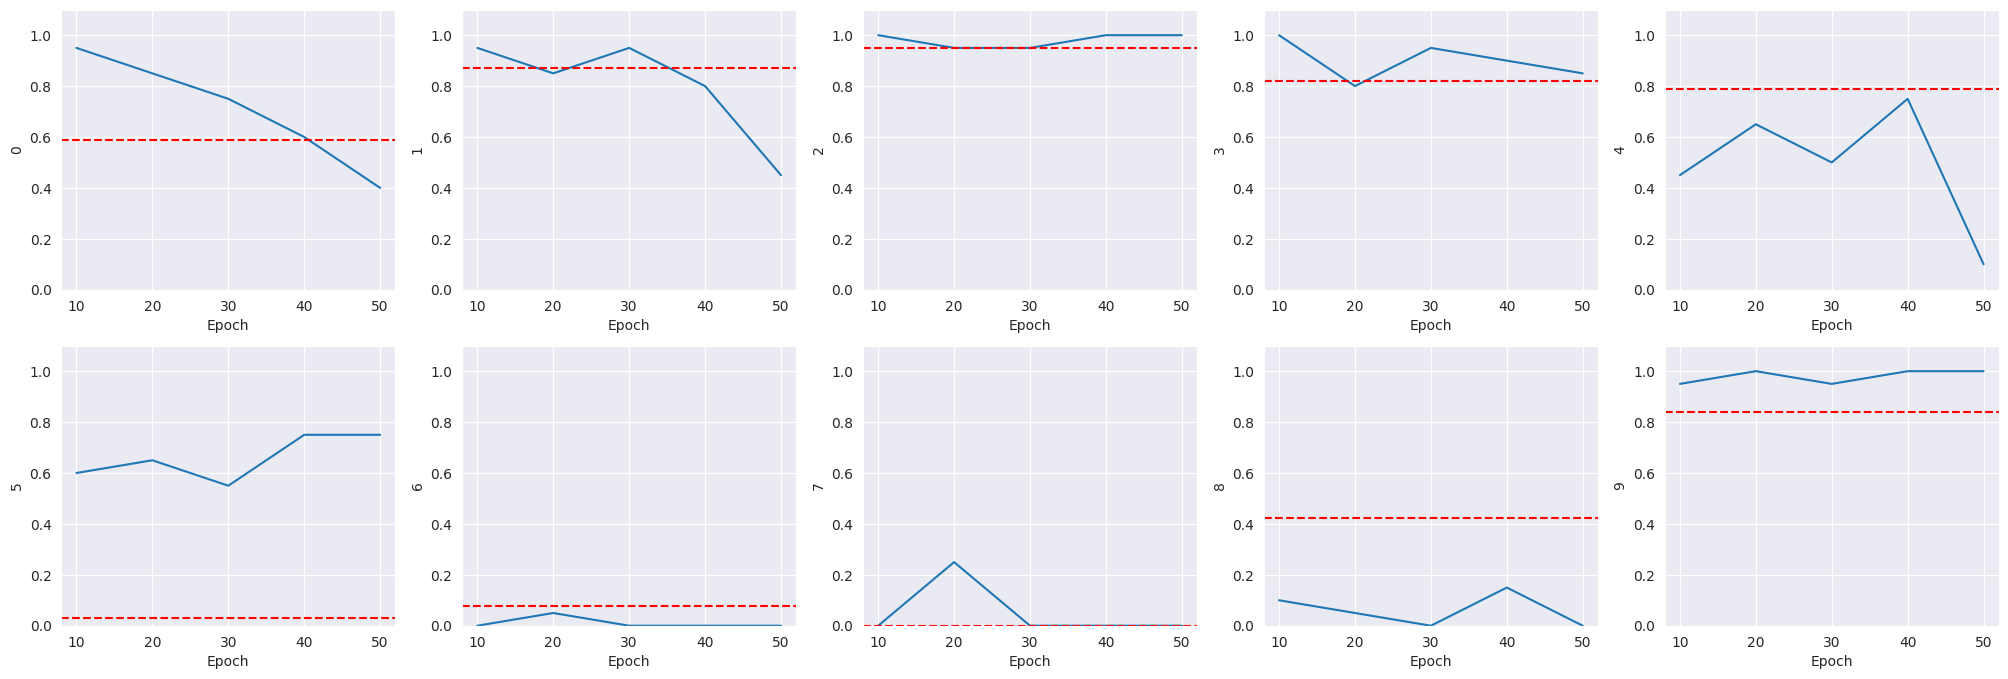

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 8))

# Flatten the axes array so we can iterate over each subplot
axes = axes.flatten()
for i in range(10):
    sns.lineplot(data=df_trans, x="Epoch", y=f'{i}', ax=axes[i])
    axes[i].axhline(y=bct_perf[i], color='r', linestyle='--')
    axes[i].set_ylim(0,1.1)

plt.show()